In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

tf.config.list_physical_devices('GPU')
tf.config.experimental.list_physical_devices('GPU')


tf.debugging.set_log_device_placement(True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6434404105238190707
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5724176384
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1090620458843833808
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')
from tqdm import tqdm
import os
import cv2
import sys
import csv

(r,theta,pie) -> (x_1,x_2,x_3) /// (x_1,x_2,x_3) -> (x,y,z) <br>
<p style="font-weight:bold">식1</p>
x_1 = r * sintheta * cospie<br>
x_2 = r * sintheta * sinpie<br>
x_3 = r * costheta<br>
  
<p style="font-weight:bold">식2</p>
r = square root(x_1^2 + x_2^2 + x_3^2)<br>
theta = tan^-1(square root(x_1^2 + x_2^2) / x_3)<br>
pie = tan^-1(x_2 / x_1)<br>

In [4]:
df = pd.read_csv('61_edit.csv')
df

,x,y,z,r,g,b
0,-4.416,-0.518,-1.313,1,1,1
1,-4.418,-0.516,-1.313,1,1,1
2,-4.416,-0.514,-1.313,1,1,1
3,-4.420,-0.521,-1.309,1,1,1
4,-4.417,-0.521,-1.311,1,1,1
...,...,...,...,...,...,...
4542885,-0.362,4.620,1.572,2,26,25
4542886,-0.364,4.623,1.573,2,26,25
4542887,-0.367,4.622,1.575,7,28,34
4542888,-0.367,4.630,1.575,7,28,34


In [5]:
x = -4.416
y = -0.518
z = -1.313

#직교좌표계에서 구면좌표계로 변환
r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
theta = np.arccos(z / r)
pie = np.arctan(y / x)
print('r:%f, theta:%f, pie:%f'% (r,theta,pie))   #라디안으로 표현

degree_theta = math.radians(theta)    #radian to degree
degree_theta = math.radians(pie) 
print(theta, pie)

#구면좌표계에서 직교좌표계로 변환
x_1 = r * np.sin(theta) * np.cos(pie)
y_1 = r * np.sin(theta) * np.sin(pie)
z_1 = r * np.cos(theta)
#print(x_1, y_1, z_1)

r:4.636092, theta:1.857939, pie:0.116767
1.857938609979789 0.11676712477671652


<IPython.core.display.Javascript object>


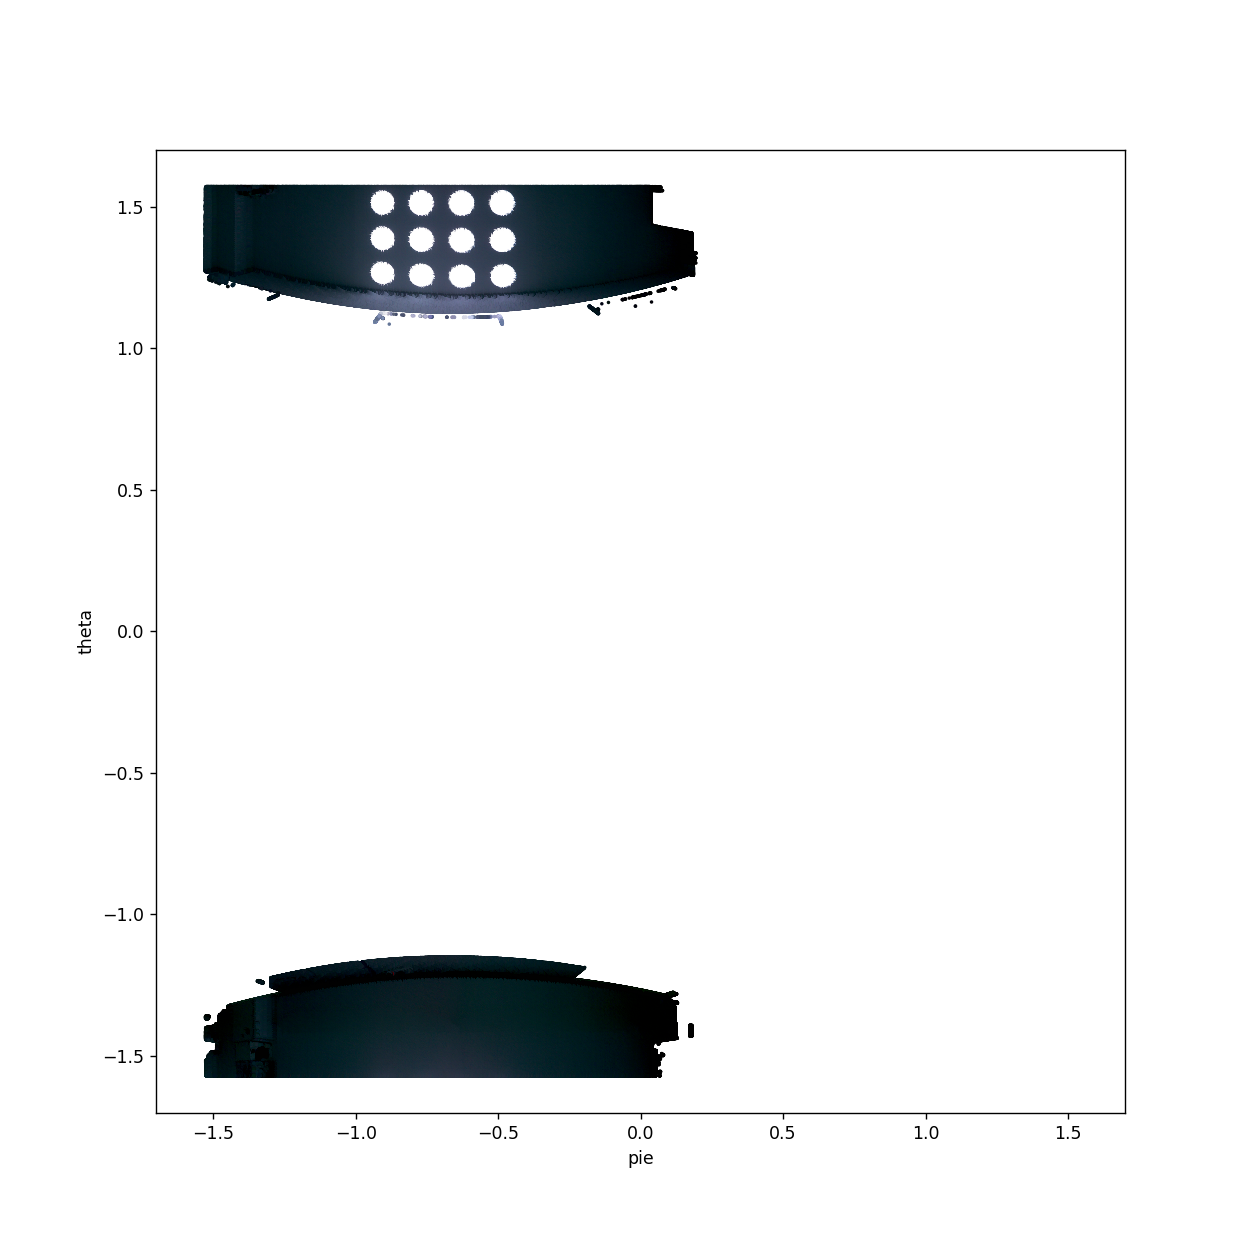

In [6]:
data = pd.read_csv('61_edit.csv')

x = data['x']
y = data['y']
z = data['z']
r = data['r']
g = data['g']
b = data['b']

numtest = 4542890
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

R = [0 for i in range(numtest)]
theta = [0 for i in range(numtest)]
pie = [0 for i in range(numtest)]

for i in range(numtest):
    R[i] = np.sqrt(x[i] ** 2 + y[i] ** 2 + z[i] ** 2)
    theta[i] = np.arctan(np.sqrt(x[i] ** 2 + y[i] **2) / z[i])
    pie[i] = np.arctan(y[i] / x[i])

for i in range(numtest):
    px[i] = R[i]
    py[i] = theta[i]
    pz[i] = pie[i]
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(pz,py, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('pie')
ax.set_ylabel('theta')
plt.xlim([-1.7,1.7])
plt.ylim([-1.7,1.7])

plt.show()

In [7]:
print('theta:',theta[0:2])
print('pie:',pie[0:2])

theta: [-1.2836540436100043, -1.283761150032796]
pie: [0.11676712477671652, 0.11626816581609004]


## minus to plus 

In [8]:
theta_m = np.min(theta)
pie_m = np.min(pie)
print('최솟값:',theta_m, pie_m)

최솟값: -1.570580548942855 -1.5278073073568195


모든 x배열에 +1.570580548942855를 해주고 y배열에 +1.5278073073568195을 해준다

In [9]:
data = pd.read_csv('61_edit.csv')

x = data['x']
y = data['y']
z = data['z']
r = data['r']
g = data['g']
b = data['b']

numtest = 4542890
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

R = [0 for i in range(numtest)]
theta = [0 for i in range(numtest)]
pie = [0 for i in range(numtest)]

for i in range(numtest):
    R[i] = np.sqrt(x[i] ** 2 + y[i] ** 2 + z[i] ** 2)
    theta[i] = np.arctan(np.sqrt(x[i] ** 2 + y[i] **2) / z[i])
    pie[i] = np.arctan(y[i] / x[i])

#음수를 양수로 만드는 과정
newTheta=[]
newPie=[]
print('theta:', theta[0:2])
print('pie:', pie[0:2])

for i in range(len(theta)):
    newTheta.append(theta[i] + 1.570580548942855)
print('newTheta:', newTheta[0:2])

for i in range(len(pie)):
    newPie.append(pie[i] + 1.5278073073568195)
print('newPie:', newPie[0:2])

theta: [-1.2836540436100043, -1.283761150032796]
pie: [0.11676712477671652, 0.11626816581609004]
newTheta: [0.2869265053328507, 0.28681939891005914]
newPie: [1.644574432133536, 1.6440754731729095]


<IPython.core.display.Javascript object>


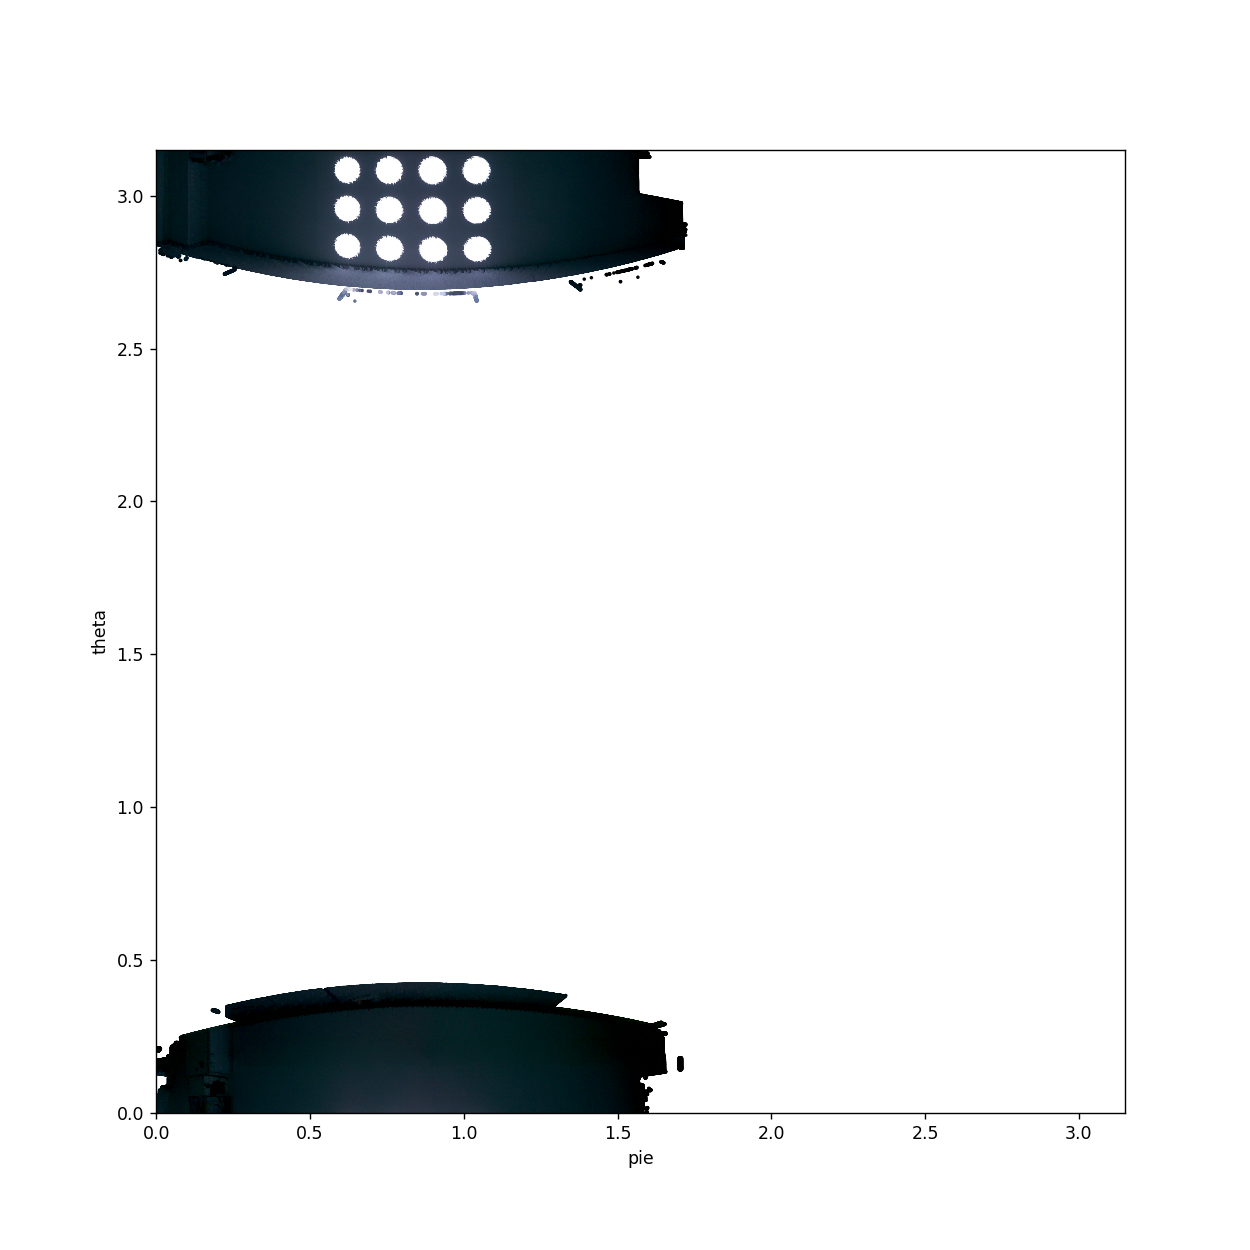

In [10]:
for i in range(numtest):
    px[i] = R[i]
    py[i] = newTheta[i]
    pz[i] = newPie[i]
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(pz,py, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('pie')
ax.set_ylabel('theta')
plt.xlim([0,3.15])
plt.ylim([0,3.15])

plt.show()

In [11]:
theta_M = np.max(newTheta)
pie_M = np.max(newPie)
print('최댓값:',theta_M, pie_M)

최댓값: 3.141160941792732 1.722350621661263


## transfer to 1920:1080 scale 

3.15 x 3.15 사이즈에서 (2,3)이라면, <br>
2 : 3.15 = x : 1920 <br>
x = 1920 * 2 / 3.15

In [12]:
theta_transfer=[]
pie_transfer=[]

for i in range(numtest):
    #theta[i] : 3.15 = x : 1920
    theta_transfer.append(1920 * newTheta[i] / 3.15)
print(theta_transfer[0:5])

for i in range(numtest):
    #theta[i] : 3.15 = x : 1920
    pie_transfer.append(1080 * newPie[i] / 3.15)
print(pie_transfer[0:5])

print('theta_transfer 원소 개수:',len(theta_transfer))
print('pr 원소 개수:',len(pr))

[174.8885365838328, 174.82325266898843, 174.90582395118236, 174.22364007134388, 174.58637264110584]
[563.8540910172123, 563.683019373569, 563.5477151080885, 564.0477263127078, 564.0747986570617]
theta_transfer 원소 개수: 4542890
pr 원소 개수: 4542890


In [13]:
num1 = 1.49
num2 = 1.99

print("소수 첫번째 자리에서 반올림 : ", round(num1))
print("소수 첫번째 자리에서 반올림 : ", round(num2))

소수 첫번째 자리에서 반올림 :  1
소수 첫번째 자리에서 반올림 :  2


1920x1080으로 변환한 theta_transfer와 pie_transfer의 범위를 알아야함. 최소값~최대값 확인

In [14]:
theta_transfer_m = np.min(theta_transfer)
theta_transfer_M = np.max(theta_transfer)

pie_transfer_m = np.min(pie_transfer)
pie_transfer_M = np.max(pie_transfer)

print('theta_transfer의 최소:, 최대:', theta_transfer_m, theta_transfer_M)
print('pie_transfer의 최소:, 최대:', pie_transfer_m, pie_transfer_M)

theta_transfer의 최소:, 최대: 0.0 1914.6123835689032
pie_transfer의 최소:, 최대: 0.0 590.5202131410044


실수들을 반올림해서 정수로 만들기.<br>
그러려면 범위를 나누고 각 범위에 해당하는 값들이 가장 많이 가지는 rgb가 무엇인지 확인한 후 그 값을 모두 할당해 줘야 함. <br>

<방법1>

1. 0~1914.6123835689032
* 0 - 0.49 → 0 / 0.5 - 0.99 → 1
* 1.0 - 1.49 → 1 / 1.5 - 1.99 → 2
* 2.0 - 2.49 → 2 / 2.5 - 2.99 → 3 <br>
...<br>
* 1913.0 - 1913.49 → 1913 /  1913.5 - 1913.99 → 1914
* 1914.0 - 1914.49 → 1914 /  1914.5 - 1914.99 → 1915
  
2. 0~590.5202131410044
* 0 - 0.49 → 0 / 0.5 - 0.99 → 1
* 1.0 - 1.49 → 1 / 1.5 - 1.99 → 2
* 2.0 - 2.49 → 2 / 2.5 - 2.99 → 3 <br>
...<br>
* 589.0 - 589.49 → 589 /  589.5 - 589.99 → 590
* 590.0 - 590.49 → 590 /  590.5 - 590.99 → 591
  
<방법 2>
1. 0~1914.6123835689032
* 0 - 0.99 → 0
* 1.0 - 1.99 → 1
* 2.0 - 2.99 → 2 <br>
...<br>
* 1913.0 - 1913.99 → 1913
* 1914.0 - 1914.99 → 1914
  
2. 0~590.5202131410044
* 0 - 0.99 → 0
* 1.0 - 1.99 → 1
* 2.0 - 2.99 → 2 <br>
...<br>
* 589.0 - 589.99 → 589
* 590.0 - 590.99 → 590

In [15]:
##map함수 테스트 해본 것
# field names  
fields = ['x', 'y']

#map 함수
list1 = [[1], [2], [3]]
list2 = [[11], [22], [33]]
list4 = [1,2,3]
list5 = [11,22,33]

def plus(x,y):
    return [x, y]
        
list3 = list(map(plus, list4, list5))
#list3 = list(map(list.__add__, list1, list2))

with open('list_test.csv', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
      
    write.writerow(fields) 
    write.writerows(list3)
        
print(list3)
print(len(list3))
print(type(list3))

[[1, 11], [2, 22], [3, 33]]
3
<class 'list'>


In [16]:
#theta_transfer, pie_transfer, pr, pg, pb
# field names  
fields = ['theta', 'pie', 'r', 'g', 'b']

def plus(theta, pie, r, g, b):
    return[theta, pie, r, g, b]

edit_list = list(map(plus, theta_transfer, pie_transfer, pr, pg, pb))

with open('sperical_circle_checkerboard.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(edit_list)

print(edit_list[0:2])

[[174.8885365838328, 563.8540910172123, 1, 1, 1], [174.82325266898843, 563.683019373569, 1, 1, 1]]


In [17]:
df2 = pd.read_csv('sperical_circle_checkerboard.csv')
df2

,theta,pie,r,g,b
0,174.888537,563.854091,1,1,1
1,174.823253,563.683019,1,1,1
2,174.905824,563.547715,1,1,1
3,174.223640,564.047726,1,1,1
4,174.586373,564.074799,1,1,1
...,...,...,...,...,...
4542885,1715.405836,12.070695,2,26,25
4542886,1715.413811,12.200786,2,26,25
4542887,1715.147650,12.427746,7,28,34
4542888,1715.466446,12.381001,7,28,34


1920x1080으로 변환한 것으로 픽셀 뿌려보기

<IPython.core.display.Javascript object>


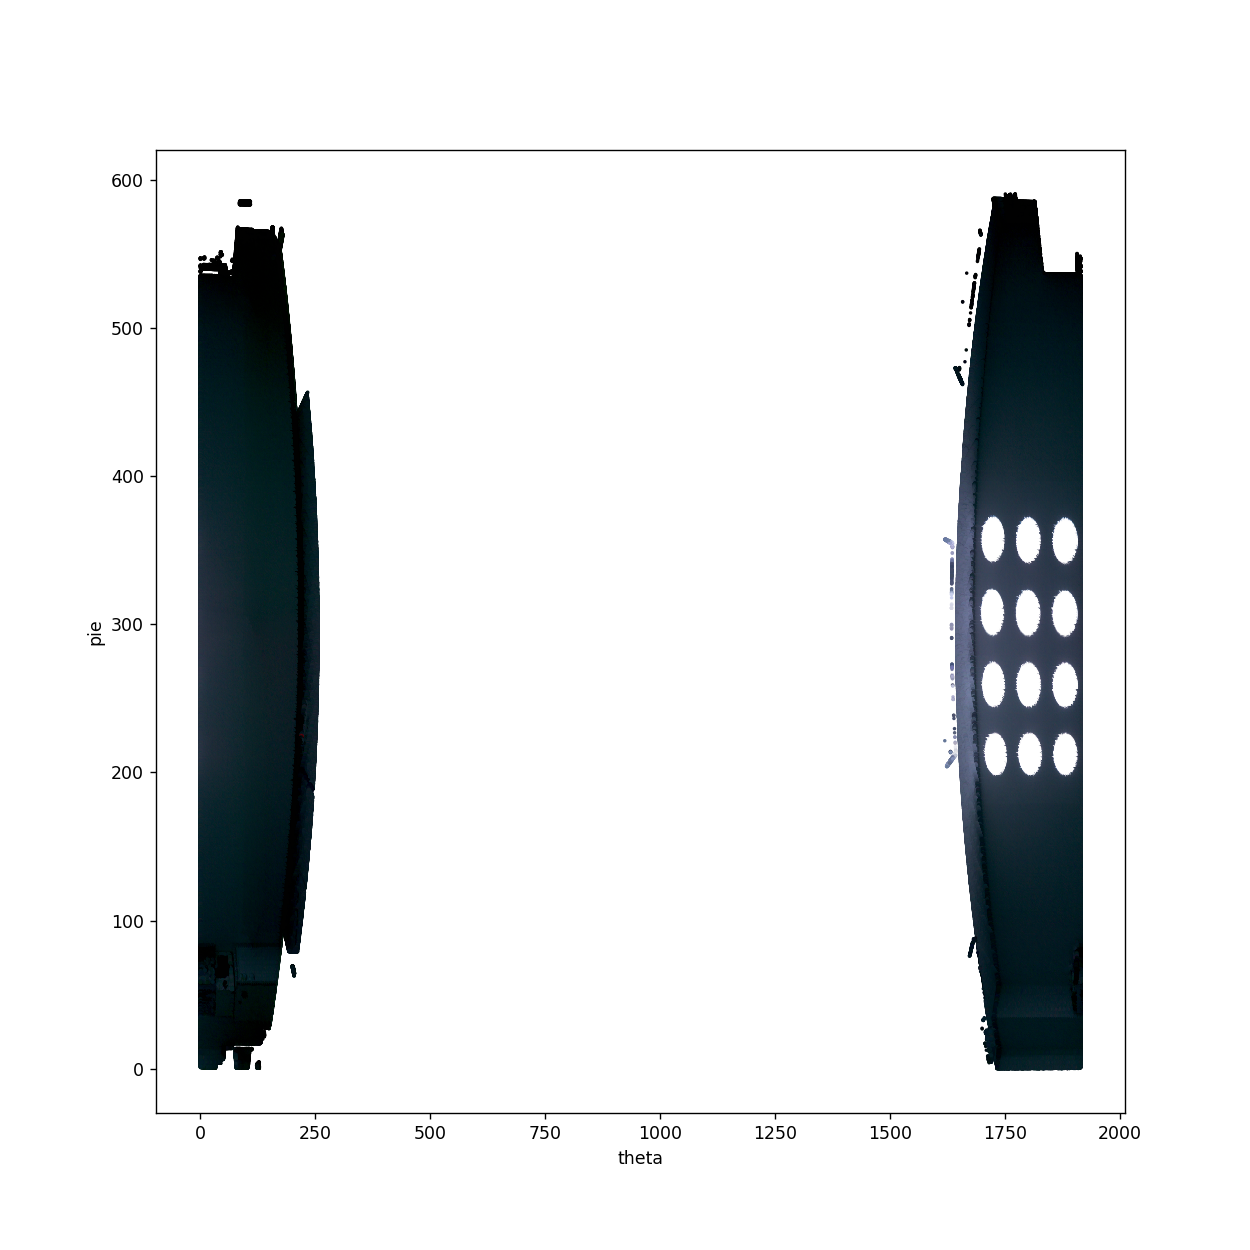

In [18]:
data = pd.read_csv('sperical_circle_checkerboard.csv')

theta = data['theta']
pie = data['pie']
r = data['r']
g = data['g']
b = data['b']

numtest = 4542890
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

for i in range(numtest):
    py[i] = theta[i]
    pz[i] = pie[i]
    #pz[i] = 0
    #px[i] = 0
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(py,pz, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('theta')
ax.set_ylabel('pie')
#plt.xlim([0,800])
#plt.ylim([0,800])

plt.show()